## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Reading Data

In [4]:
train_data = pd.read_excel("Data_Train.xlsx")

In [5]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## 3. Dealing with Missing Values

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [10]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Given that there's only one missing value, we can simply remove it from the dataset.

In [12]:
train_data.dropna(inplace = True)

## 4. Data Preprocessing & Extracting derived attributes from "Date_of_Journey"

In [14]:
data = train_data.copy()

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
data[['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']].head()

,Dep_Time,Arrival_Time,Date_of_Journey
0,22:20,01:10 22 Mar,24/03/2019
1,05:50,13:15,1/05/2019
2,09:25,04:25 10 Jun,9/06/2019
3,18:05,23:30,12/05/2019
4,16:50,21:35,01/03/2019


In [17]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The "Date_of_Journey" column is currently stored as an object (string) data type. To make this column useful for modeling, we need to convert it into a datetime format. Machine learning models can't inherently understand string representations of dates—they require a proper datetime format to extract meaningful time-based features like the day, month, or day of the week.

By converting "Date_of_Journey" to a datetime data type using `pandas.to_datetime`, we can effectively work with this data and ensure our model interprets these values correctly. This step is crucial as it allows us to derive additional features that could be important for prediction, such as the journey date or month, which may influence flight fares. pe.

In [19]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [20]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [21]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [22]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [23]:
data['Date_of_Journey'].dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int32

In [24]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [25]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-15 05:50:00,2024-08-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


## 5. Cleaning Dep_Time & Arrival_Time & Extracting derived attributes

In [28]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [29]:
# Departure time is when a plane leaves the gate
extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-15 05:50:00,2024-08-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [30]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-15 05:50:00,2024-08-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [31]:
# Since we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [32]:
data.shape

(10682, 16)

## 6. Analysing when will most of the flights take-off

In [34]:
# Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time and convert into appropriate format.
    
    '''
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

In [35]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

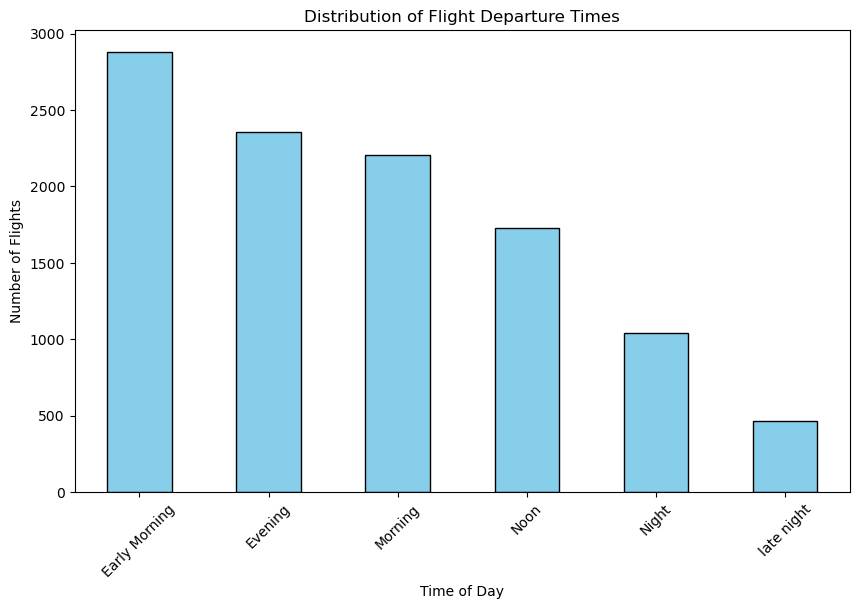

In [36]:
plt.figure(figsize=(10, 6))
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color='skyblue', edgecolor='black')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight Departure Times')
plt.xticks(rotation=45)
plt.show()

To enhance the above graph with interactivity, we will leverage Cufflinks and Plotly. These libraries will allow us to create interactive bar charts that offer features like zooming, hovering over data points for details, and more, making the visualization more engaging and informative.

In [38]:
!pip install cufflinks

In [39]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

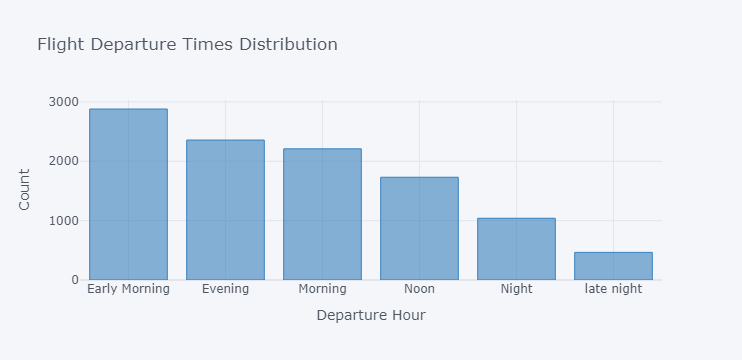

In [40]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar", 
                                                                  title="Flight Departure Times Distribution", 
                                                                  xTitle="Departure Hour", 
                                                                  yTitle="Count", 
                                                                  color="blue")

##  7. Pre-processing Duration Feature & Extracting meaningful features from it

To make the "Duration" feature usable for our machine learning model, we need to preprocess and extract the duration's hours and minutes. Since the "Duration" column currently contains string values (e.g., "2h 50m"), the model can't interpret this information directly.

By breaking down the duration into separate numeric features for hours and minutes, we can help the model understand the total travel time more effectively. This process involves parsing the string to identify and convert the hour and minute components into numerical values. This way, each row will have clear hour and minute data, making it easier for the model to utilize these features for predictions.

In [58]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [67]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

Even after preprocessing the "Duration" feature to ensure a consistent format, the data is still in string form. Since machine learning models require numerical inputs, we need to convert the duration into numerical values. Specifically, we should extract the hours and minutes from the duration and convert them into integers or floats. This transformation will allow our model to understand and leverage the duration feature effectively during the training process.

In [72]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [73]:
data['Duration_hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10682, dtype: int64

In [74]:
data['Duration_mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_mins, Length: 10682, dtype: int64

In [75]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


## 8. Analysing whether Duration impacts Price or not?

In [77]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

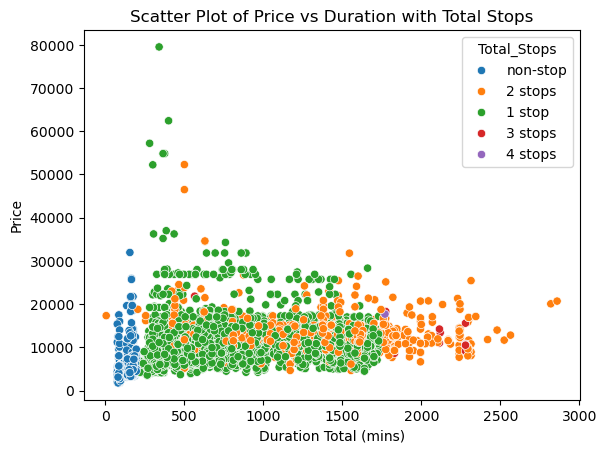

In [78]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

plt.xlabel('Duration Total (mins)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Duration with Total Stops')
plt.show()

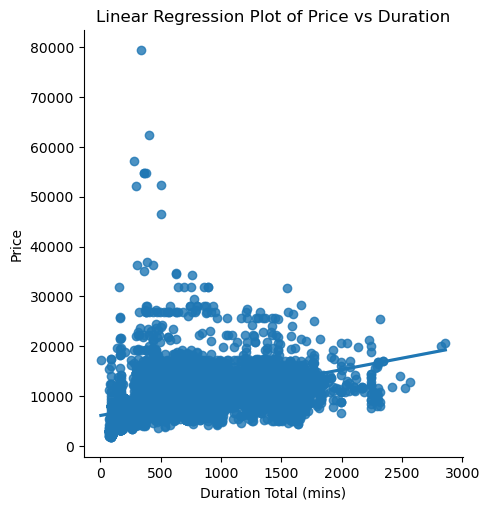

In [79]:
sns.lmplot(x='Duration_total_mins', y='Price', data=data)

plt.xlabel('Duration Total (mins)')
plt.ylabel('Price')
plt.title('Linear Regression Plot of Price vs Duration')
plt.show()

**Observation**: There is a clear positive correlation between the duration of the flight and its price; as the duration in minutes increases, the flight price also tends to increase.

## 9. On which route Jet Airways is extremely used?

In [94]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [96]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

The data indicates that the most frequently used route for Jet Airways is from Kolkata (CCU) to Bangalore (BLR) via Mumbai (BOM), with 930 instances.

## 10. Performing Airline vs Price Analysis

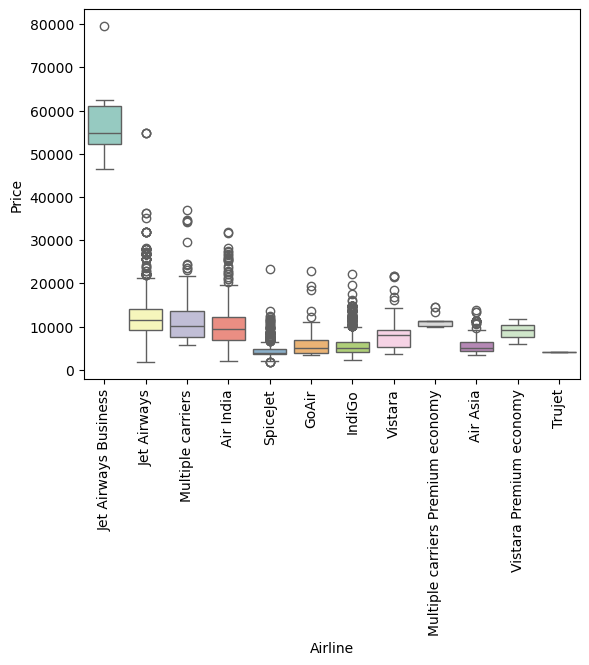

In [100]:
sns.boxplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False), palette='Set3')
plt.xticks(rotation = 'vertical')
plt.show()

**Observation**: The graph reveals that Jet Airways Business class has the highest prices. Except for the first airline, nearly all others have a similar median price.

## 11. Applying One-Hot Encoding on Data

In [104]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [106]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [108]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [110]:
num_col = [col for col in data.columns if data[col].dtype != 'object']
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [112]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [114]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [116]:
for sub_category in data['Source'].unique():
    data['Source_'+ sub_category] = data['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [118]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


## 12. Performing Target Guided Encoding on Data

When dealing with categorical features like "Airline" and "Destination," applying one-hot encoding is appropriate because these features have no inherent order. However, for ordinal features like "Total_Stops," one-hot encoding is not suitable, as it would ignore the natural order of the categories. 

Moreover, if a feature has a large number of categories, applying one-hot encoding can lead to the curse of dimensionality, increasing the complexity of the model and consuming more computational resources.

To address this, we can use techniques like **Target Guided Encoding** or **Mean Encoding**. These methods encode categories based on the relationship between the feature and the target variable (in this case, "Price"). Target Guided Ordinal Encoding assigns numerical values to categories based on the mean of the target variable, helping preserve the relationship between the feature and the outcome while reducing dimensionality.

In [122]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [124]:
data['Airline'].nunique()

12

In [126]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [128]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [130]:
dict_airlines = {key: index for index, key in enumerate(airlines, 0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [132]:
data['Airline'] = data['Airline'].map(dict_airlines)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [134]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [136]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Currently, Delhi has only one functional airport, Indira Gandhi International (IGI) Airport. Although the development of a second airport in Greater Noida (Jewar) is underway, which is in the neighboring region of Delhi, the current infrastructure treats both "Delhi" and "New Delhi" as the same destination. Therefore, for the purpose of this analysis, we will consider "Delhi" and "New Delhi" as a single destination. However, it is important to note that these conditions might change in the future once the new airport becomes operational, and separate distinctions between the two may be necessary.

In [138]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [140]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [142]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [144]:
dict_dest = {key: index for index, key in enumerate(dest, 0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [146]:
data['Destination'] = data['Destination'].map(dict_dest)
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [148]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


## 13. Perform Label (Manual) Encoding on Data

In [151]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [153]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [155]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [157]:
data['Total_Stops'] = data['Total_Stops'].map(stop)
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [159]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [161]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [163]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

Nearly 80% of the entries in the `Additional_Info` column are labeled as "No info". Therefore, considering the high prevalence of missing or unspecified information in this column, it may be appropriate to drop it from the dataset.

In [166]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [168]:
data['Journey_year'].unique()

array([2019])


1. We can drop `Date_of_Journey` since we have already extracted `Journey_hour`, `Journey_month`, and `Journey_day`.
2. The `Additional_Info` column can be dropped because almost 80% of its entries are labeled as "No info".
3. `Duration_total_mins` is redundant as we have already extracted `Duration_hours` and `Duration_mins`.
4. `Source` can be dropped since we have already performed feature encoding on this feature.
5. `Journey_year` can also be dropped because it has constant values throughout the dataframe (specifically, all values are 2019).
6. We can drop `Route` as well because it is directly related to `Total_Stops`, and including both features does not add meaningful information for building a machine learning model.
7. Lastly, `Duration` can be dropped as we have already extracted `Duration_hour` and `Duration_minute`.

These actions aim to streamline the dataset by removing redundant or unnecessary columns after extracting relevant features for analysis or modeling.

In [171]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year', 'Route', 'Duration'] , axis=1 , inplace=True)

In [173]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


### 14. Performing Outlier detection

**Causes of Outliers:**

1. **Data Entry Errors:** 
   Human errors during data collection, recording, or entry can introduce outliers. These errors may include typographical mistakes, incorrect manual inputs, or flawed data transcription, leading to values that significantly deviate from the norm.

2. **Measurement Errors:** 
   Outliers often arise due to inaccuracies in measurement. Faulty instruments, incorrect calibration, or environmental factors affecting the measurement process can result in values that are significantly different from expected ranges. This is one of the most common sources of outliers in datasets.

In [177]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
    
    # Plot 1: Distribution plot with kernel density estimate (KDE)
    sns.distplot(df[col], ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    
    # Plot 2: Box plot
    sns.boxplot(x=df[col], orient='h', ax=ax2)
    ax2.set_title(f'Boxplot of {col}')
    
    # Plot 3: Distribution plot with counts
    sns.histplot(df[col], ax=ax3, kde=False)
    ax3.set_title(f'Distribution (counts) of {col}')
    
    plt.tight_layout()
    plt.show()

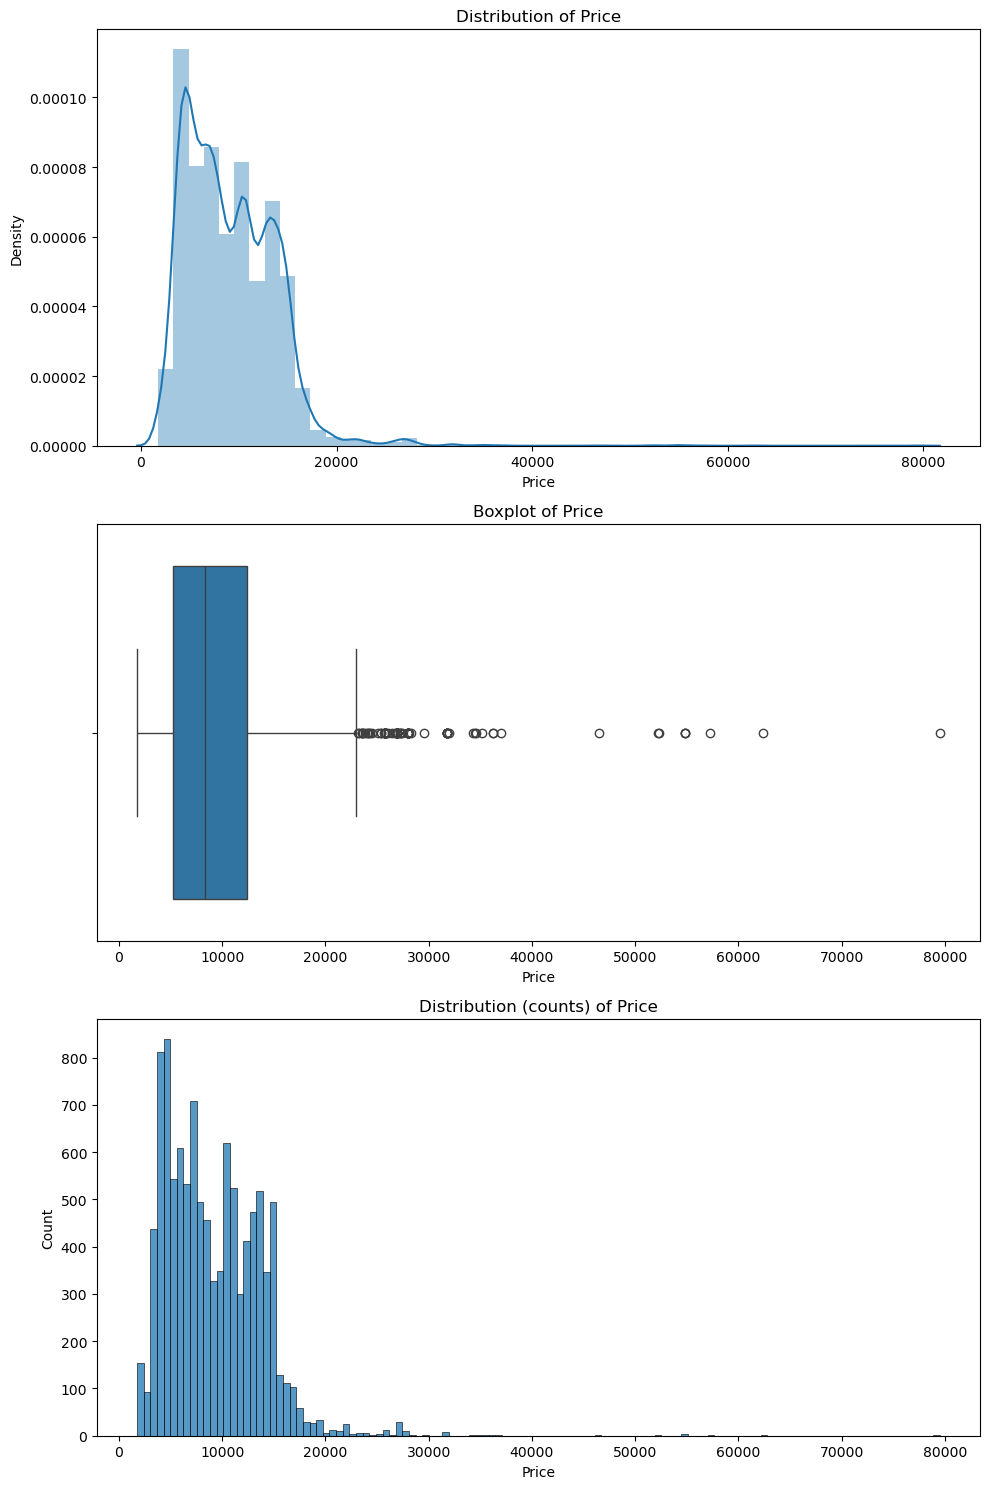

In [179]:
plot(data, 'Price')

In [180]:
q3 = data['Price'].quantile(0.75)
q1 = data['Price'].quantile(0.25)

iqr = q3 - q1
max = q3 + 1.5 * iqr
min = q1 - 1.5 * iqr

In [181]:
print(max)

23017.0


In [182]:
print(min)

-5367.0


In [183]:
outliers = [price for price in data['Price'] if price > max or price < min]
print(outliers)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [184]:
len(outliers)

94

In [185]:
# Let's say the Threshold value is 35k
data['Price'] = np.where(data['Price'] > 35000, data['Price'].median(), data['Price'])

The purpose of this code is to handle outliers in the `Price` column by capping prices that are exceptionally high (greater than 35,000). Instead of these high values, the code replaces them with the median price. This helps in making the dataset more robust by reducing the influence of extreme values, which can be particularly useful for statistical analysis or machine learning models.

**Note**: We used the median for replacement instead of the mean because the mean is affected by outliers, whereas the median provides a more accurate central value in the presence of extreme values.

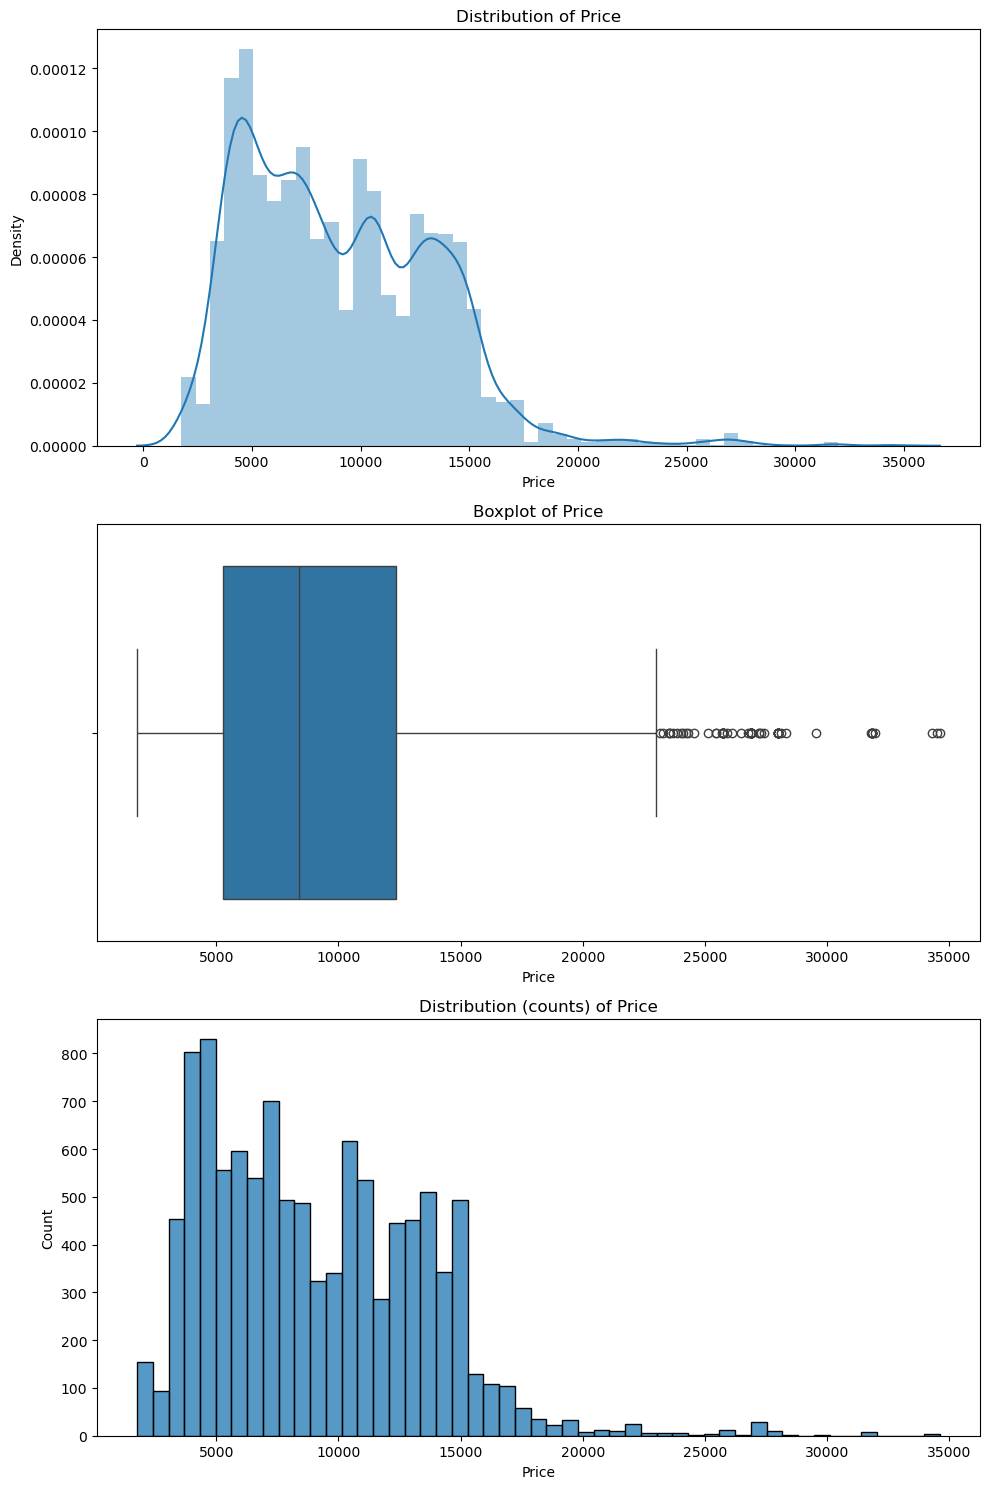

In [194]:
plot(data, 'Price')

## 15. Performing Feature Selection

In [196]:
X = data.drop(['Price'], axis = 1)

In [197]:
y = data['Price']

In [199]:
from sklearn.feature_selection import mutual_info_regression

In [202]:
imp_val = mutual_info_regression(X, y)
imp_val

array([1.33188748, 1.0657445 , 0.79662931, 0.37081684, 0.63757661,
       0.91631686, 0.76053568, 1.13528286, 0.89906593, 1.1193151 ,
       0.67352757, 0.39459411, 0.45605011, 0.52190056, 0.13243723,
       0.19840255])

In [203]:
imp_df = pd.DataFrame(imp_val, index = X.columns)
imp_df.columns = ['Importance']
imp_df

,Importance
Airline,1.331887
Destination,1.065745
Total_Stops,0.796629
Journey_day,0.370817
Journey_month,0.637577
Dep_Time_hour,0.916317
Dep_Time_minute,0.760536
Arrival_Time_hour,1.135283
Arrival_Time_minute,0.899066
Duration_hours,1.119315


In [205]:
imp_df.sort_values(by = 'Importance', ascending = False)

,Importance
Airline,1.331887
Arrival_Time_hour,1.135283
Duration_hours,1.119315
Destination,1.065745
Dep_Time_hour,0.916317
Arrival_Time_minute,0.899066
Total_Stops,0.796629
Dep_Time_minute,0.760536
Duration_mins,0.673528
Journey_month,0.637577


## 16. Building ML model

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [209]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
ml_model = RandomForestRegressor()

In [218]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [219]:
y_pred = ml_model.predict(X_test)
y_pred

array([16862.54,  5350.35,  8816.41, ...,  3488.73,  6311.28,  6825.91])

In [220]:
from sklearn import metrics

In [221]:
metrics.r2_score(y_test , y_pred)

0.8107721584833757

### Dumping ML Model Using Pickle

**Advantages of Dumping a Machine Learning Model Using Pickle:**

1. **Reusability:** Once trained, the model can be saved and reused for future predictions without retraining, saving time and resources.

2. **Efficiency:** Pre-trained models can be quickly loaded for predictions, reducing the computational cost compared to retraining.

3. **Deployment:** Saved models can be easily integrated into applications or APIs, enabling fast and efficient predictions in production environments.

4. **Consistency:** Dumping ensures that the exact version of the trained model is preserved, maintaining consistent predictions over time.

5. **Scalability:** Pre-trained models can be used across multiple machines or processes, optimizing performance for large-scale predictions.

In [228]:
import pickle

In [230]:
file = open(r'C:\Users\masan\Flight Fare Prediction/rf_random.pkl' , 'wb')

In [232]:
pickle.dump(ml_model , file)

In [234]:
model = open(r'C:\Users\masan\Flight Fare Prediction/rf_random.pkl' , 'rb')

In [236]:
forest = pickle.load(model)

In [238]:
y_pred2 = forest.predict(X_test)

In [240]:
metrics.r2_score(y_test , y_pred2)

0.8107721584833757

## 17. Automating ML pipeline & Defining Evaluation Metric


### a. Making our own metric

In [242]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [244]:
mape(y_test , y_pred)

13.148287497217003

### b. Automating ML pipeline

In [247]:
from sklearn import metrics

In [249]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_prediction = model.predict(X_test)
    print('predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_prediction))))
    print('MAPE : {}'.format(mape(y_test , y_prediction)))
    sns.distplot(y_test - y_prediction)

Training score : 0.9513553045598521
predictions are : [16832.86  5437.93  8772.82 ...  3504.05  6207.74  6897.4 ]


r2 score : 0.8100671810289829
MAE : 1178.8163429798394
MSE : 3697536.083054376
RMSE : 1922.8978347937198
MAPE : 13.21206117726414


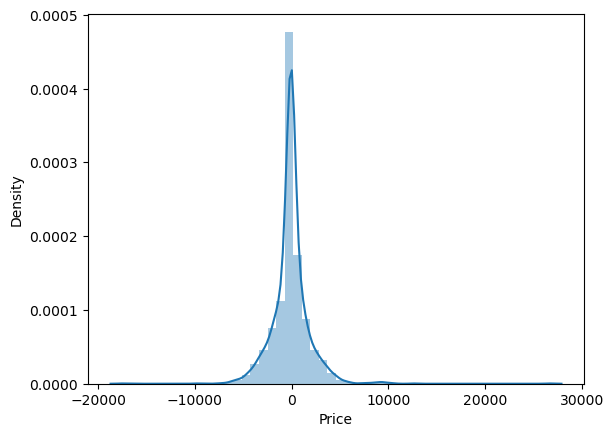

In [251]:
predict(RandomForestRegressor())

In [253]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6772385152189984
MAE : 1417.2002121552478
MSE : 6283391.373136362
RMSE : 2506.669378505343
MAPE : 15.667652466087482


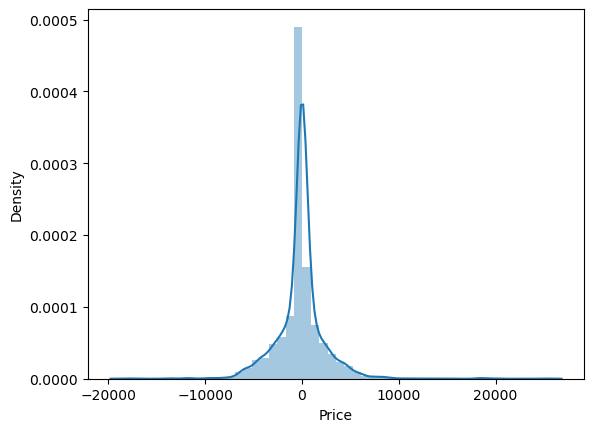

In [255]:
predict(DecisionTreeRegressor())

## 18. Hypertuning ML Model

In [258]:
from sklearn.model_selection import RandomizedSearchCV

In [260]:
reg_rf = RandomForestRegressor()

In [262]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [264]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [266]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [268]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [284]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [286]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [287]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [290]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=1200)

In [292]:
rf_random.best_score_

0.8049119556897982

### Expanded Hyperparameter Space

In [294]:
random_grid = {
    'n_estimators': [100, 300, 500, 800, 1200, 1600, 2000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                               param_distributions=random_grid, 
                               n_iter=100,  # Increase iterations for a larger search space
                               cv=5,  # More folds for cross-validation
                               verbose=2, 
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200, 1600, 2000]},
                   verbose=2)

In [296]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [298]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=10, n_estimators=2000)

In [300]:
rf_random.best_score_

0.8214467363411855

**Observation:** By expanding the hyperparameter space and tuning with a broader set of options, we improved the model's performance from an `R² score` of **0.8049** to **0.8214**. The best model in the updated search has a higher `max_depth` (40 vs. 13), more `n_estimators` (2000 vs. 1200), and a different `min_samples_split` (10 vs. 5), indicating that the model benefits from deeper trees and more estimators. Additionally, switching `bootstrap` to `False` suggests that using the entire dataset for each tree improved the model's generalization. 

This demonstrates that a larger hyperparameter search can lead to more optimal settings, yielding a model that captures more data patterns and improves predictive performance.